<div style="text-align: center;">
    <h1>AtliQ Hotels Data Analysis Project</h1>

## 1. Data Import and Data Exploration

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_bookings = pd.read_csv(r"C:\Users\Asmun\Downloads\64101194a2364\source-code\3_project_hospitality_analysis\datasets\fact_bookings.csv")
df_date = pd.read_csv(r"C:\Users\Asmun\Downloads\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_date.csv")
df_hotels = pd.read_csv(r"C:\Users\Asmun\Downloads\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_hotels.csv")
df_rooms = pd.read_csv(r"C:\Users\Asmun\Downloads\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_rooms.csv")
df_agg_bookings = pd.read_csv(r"C:\Users\Asmun\Downloads\64101194a2364\source-code\3_project_hospitality_analysis\datasets\fact_aggregated_bookings.csv")


In [94]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [95]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [96]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [6]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

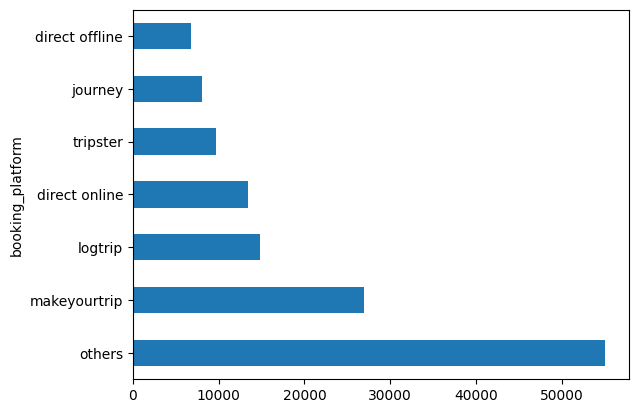

In [97]:
df_bookings.booking_platform.value_counts().plot(kind="barh")

## 2. Data Cleaning

In [98]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [99]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [100]:
df_hotels.shape

(25, 4)

In [101]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [102]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: ylabel='city'>

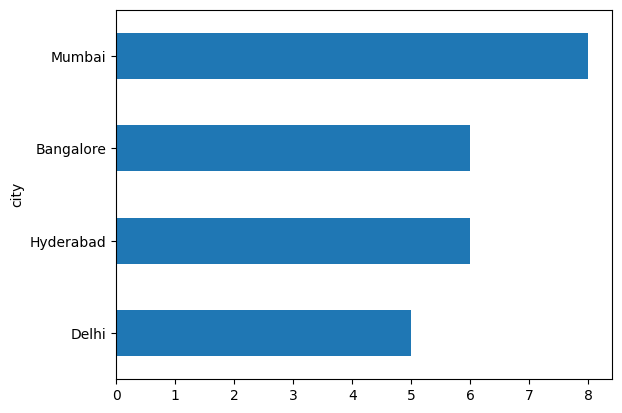

In [103]:
df_hotels.city.value_counts().sort_values().plot(kind="barh")

In [104]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [105]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [106]:
total_booking = df_agg_bookings.groupby("property_id")["successful_bookings"].sum().reset_index()
total_booking

,property_id,successful_bookings
0,16558,3153
1,16559,7338
2,16560,4693
3,16561,4418
4,16562,4820
5,16563,7211
6,17558,5053
7,17559,6142
8,17560,6013
9,17561,5183


In [107]:
over_booked = df_agg_bookings[df_agg_bookings["successful_bookings"]> df_agg_bookings["capacity"]].reset_index()

In [108]:
over_booked

,index,property_id,check_in_date,room_category,successful_bookings,capacity
0,3,17558,1-May-22,RT1,30,19.0
1,12,16563,1-May-22,RT1,100,41.0
2,4136,19558,11-Jun-22,RT2,50,39.0
3,6209,19560,2-Jul-22,RT1,123,26.0
4,8522,19559,25-Jul-22,RT1,35,24.0
5,9194,18563,31-Jul-22,RT4,20,18.0


In [109]:
max_capacity = df_agg_bookings["capacity"].max()

In [110]:
max_capacity

50.0

In [111]:
property_with_highest_capacity = df_agg_bookings[df_agg_bookings["capacity"] == max_capacity]
property_with_highest_capacity

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


In [112]:
df_bookings.shape

(134590, 12)

In [113]:
df_bookings = df_bookings[df_bookings.no_guests > 0]
df_bookings.shape

(134578, 12)

In [114]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [115]:
avg,std = df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()
avg,std

(15378.036937686695, 93040.1549314641)

In [116]:
higher_limit = avg + 3*std
higher_limit

294498.50173207896

In [117]:
lower_limit = avg - 3*std
lower_limit

-263742.4278567056

In [118]:
df_bookings = df_bookings[df_bookings.revenue_generated < higher_limit]
df_bookings.shape

(134573, 12)

In [119]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [120]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [121]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [122]:
df_agg_bookings.capacity.describe()

count    9198.000000
mean       25.280496
std        11.442080
min         3.000000
25%        18.000000
50%        25.000000
75%        34.000000
max        50.000000
Name: capacity, dtype: float64

In [123]:
print("\nRows with null capacity:")
print(df_agg_bookings[df_agg_bookings['capacity'].isnull()])


Rows with null capacity:
    property_id check_in_date room_category  successful_bookings  capacity
8         17561      1-May-22           RT1                   22       NaN
14        17562      1-May-22           RT1                   12       NaN


In [124]:
median_capacity = df_agg_bookings['capacity'].median()
df_agg_bookings['capacity'].fillna(median_capacity, inplace=True)

In [125]:
median_capacity

25.0

In [126]:
remaining_nulls = df_agg_bookings['capacity'].isnull().sum()
print(f"\nRemaining null values in capacity column: {remaining_nulls}")


Remaining null values in capacity column: 0


In [127]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


## 3. Data Transformation

In [128]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [129]:
df_agg_bookings["occ_pct"] = (df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]).apply(lambda x : round(x*100,2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


## 4. Insights Generation

#### 1. Average occupancy rate in each of the room categories:

In [130]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [131]:
df = pd.merge(df_agg_bookings, df_rooms, left_on = "room_category", right_on = "room_id")
df.drop("room_category", axis = 1, inplace = True)
df.tail()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_id,room_class
9195,16563,31-Jul-22,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,3,6.0,50.00,RT4,Presidential
9199,17561,31-Jul-22,3,4.0,75.00,RT4,Presidential


In [132]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

### 2. Average occupancy rate per city:

In [133]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [134]:
df = pd.merge(df_agg_bookings, df_hotels, on = "property_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,16559,1-May-22,RT2,35,41.0,85.37,Atliq Exotica,Luxury,Mumbai
2,16559,1-May-22,RT3,27,32.0,84.38,Atliq Exotica,Luxury,Mumbai
3,16559,1-May-22,RT4,17,18.0,94.44,Atliq Exotica,Luxury,Mumbai
4,16559,2-May-22,RT1,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai


<Axes: xlabel='city'>

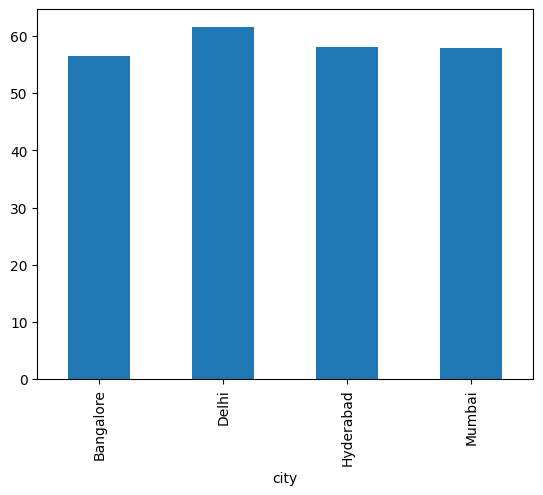

In [135]:
df.groupby("city")["occ_pct"].mean().round(2).plot(kind = "bar")

### 3. Better occupancy, Weekday or Weekend:

In [136]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [137]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,16559,1-May-22,RT2,35,41.0,85.37,Atliq Exotica,Luxury,Mumbai
2,16559,1-May-22,RT3,27,32.0,84.38,Atliq Exotica,Luxury,Mumbai


In [138]:
df = pd.merge(df,df_date, left_on = "check_in_date",  right_on = "date")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT2,25,41.0,60.98,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT1,18,30.0,60.00,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,17564,31-Jul-22,RT4,10,17.0,58.82,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6496,18560,31-Jul-22,RT1,22,30.0,73.33,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6497,18560,31-Jul-22,RT2,34,40.0,85.00,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6498,18560,31-Jul-22,RT3,17,24.0,70.83,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend


In [139]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

<Axes: ylabel='occ_pct'>

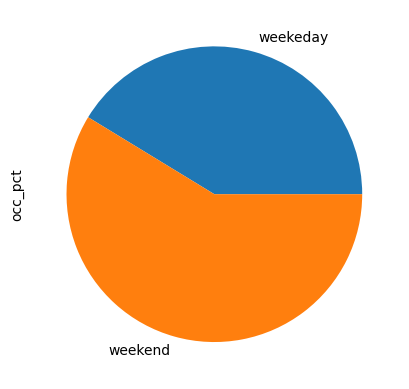

In [140]:
df.groupby("day_type")["occ_pct"].mean().round(2).plot(kind="pie")

### 4. Occupancy for different cities in the month of June:

In [141]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT2,25,41.0,60.98,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT1,18,30.0,60.00,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [142]:
df[df["mmm yy"]=="Jun 22"].groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

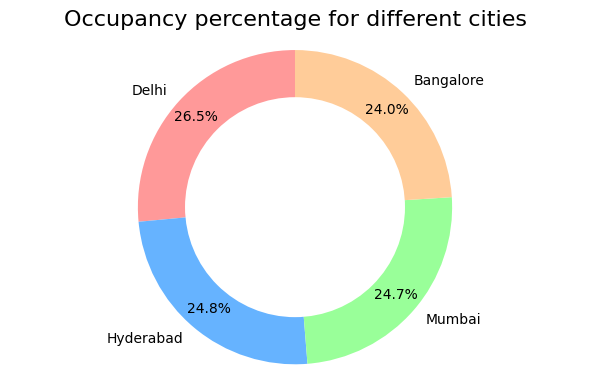

In [143]:
categories = ['Delhi', 'Hyderabad', 'Mumbai', 'Bangalore']
values = [62.47, 58.46, 58.38, 56.58]  
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots(figsize=(6, 4))

wedges, texts, autotexts = ax.pie(values, labels=categories, colors=colors,
                                  autopct='%1.1f%%', startangle=90,
                                  pctdistance=0.85, wedgeprops=dict(width=0.5))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.title("Occupancy percentage for different cities", fontsize=16)

plt.tight_layout()
plt.show()


### 5. Append new data with existing data in the month of August:

In [144]:
df_august = pd.read_csv(r"C:\Users\Asmun\OneDrive\Desktop\datasets\new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [145]:
df_august.shape

(7, 13)

In [146]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT2,25,41.0,60.98,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT1,18,30.0,60.00,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [147]:
df.shape

(6500, 13)

In [148]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(7)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type,room_class,occ%
6500,16559,01-Aug-22,RT1,30,30.0,NaN,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,Standard,100.00
6501,19562,01-Aug-22,RT1,21,30.0,NaN,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,Standard,70.00
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,Standard,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,Standard,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,Standard,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,Standard,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,Standard,62.50


In [149]:
latest_df.shape

(6507, 15)

### 6. Print revenue realized per city:

In [150]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [151]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [152]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [153]:
df_bookings_all.groupby("city")["revenue_realized"].sum().sort_values(ascending=False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

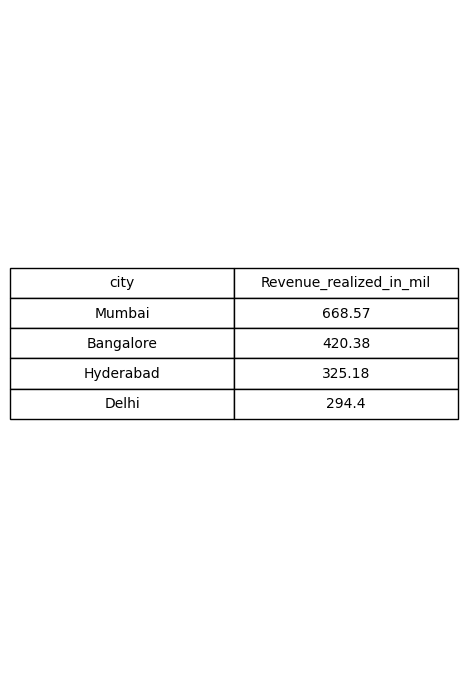

In [64]:
data = {
    'City': ['Mumbai', 'Bangalore', 'Hyderabad', 'Delhi'],
    'Revenue_realized': [668569251, 420383550, 325179310, 294404488]
}

df_table = pd.DataFrame(data)

df_table['Revenue_realized'] = (df_table['Revenue_realized'] / 1_000_000).round(2)

fig, ax = plt.subplots()

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=df_table.values, colLabels=["city","Revenue_realized_in_mil"], cellLoc='center', loc='center')

plt.subplots_adjust(left=0.2, top=1.5)

plt.show()


### 7. Print month by month revenue:

In [154]:
df_bookings_all.head(13)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
5,May012216558RT19,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
6,May012216558RT110,16558,28-04-22,1/5/2022,2/5/2022,1.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
7,May012216558RT111,16558,29-04-22,1/5/2022,7/5/2022,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
8,May012216558RT112,16558,26-04-22,1/5/2022,2/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
9,May012216558RT113,16558,26-04-22,1/5/2022,7/5/2022,2.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [155]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [157]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [156]:
df_bookings_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [163]:
df_date["date"] = pd.to_datetime(df_date["date"], format = '%d-%m-%y')
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [164]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [168]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], format = 'mixed')

df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [169]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [179]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date",suffixes=('', '_date'))
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,week no_y,day_type_y,date,mmm yy,week no,day_type,date_date,mmm yy_date,week no_date,day_type_date
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,...,W 19,weekeday,2022-05-05,May 22,W 19,weekeday,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,...,W 19,weekeday,2022-05-05,May 22,W 19,weekeday,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,...,W 19,weekeday,2022-05-05,May 22,W 19,weekeday,2022-05-05,May 22,W 19,weekeday


In [197]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()


mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

<Axes: ylabel='mmm yy'>

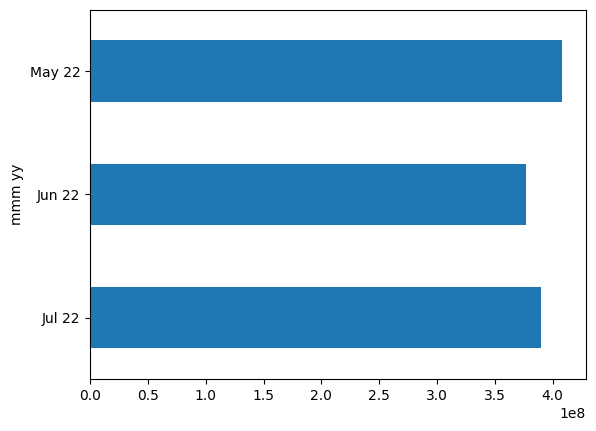

In [198]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum().plot(kind = "barh")

### 8. Print revenue realized per hotel type:

In [206]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [207]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     45920757
Atliq Grands     145860641
Atliq Blu        179203544
Atliq Bay        179416721
Atliq City       196555383
Atliq Palace     209474575
Atliq Exotica    219076161
Name: revenue_realized, dtype: int64

<Axes: xlabel='property_name'>

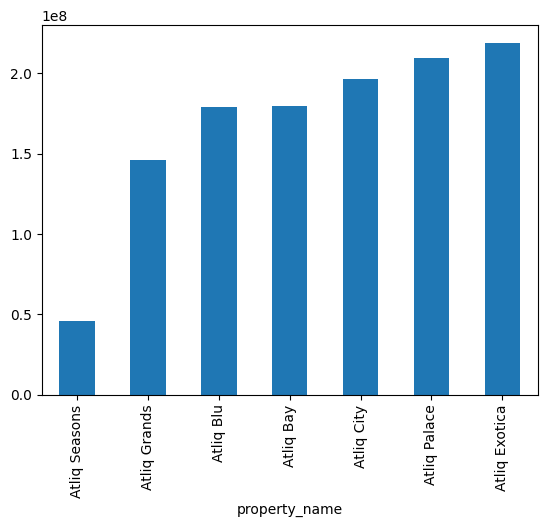

In [208]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values().plot(kind = "bar")

### 9. Print average rating per city:

In [210]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [212]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

### 10. Print a pie chart of revenue realized per booking platform:

In [213]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [215]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().round(2)

booking_platform
direct offline     86374933
direct online     168948637
journey           102531334
logtrip           187494028
makeyourtrip      340814104
others            699306762
tripster          123066801
Name: revenue_realized, dtype: int64

<Axes: ylabel='revenue_realized'>

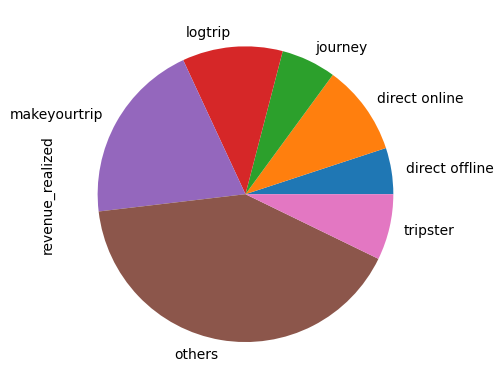

In [216]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().round(2).plot(kind = "pie")